In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib

# Data preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# K means 
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

# Silhouette score 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")

# LDC
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
office = pd.read_csv("customer_retention_office.csv")
office

,reviewerID,reviewTime,main_cat,reviewText,verified,review_sentiment
0,A2NIJTYWADLK57,2017-11-07,Office Products,kids like story but while i really wanted a bo...,True,Positive
1,A2827D8EEURMP4,2017-03-07,Office Products,bought this used and it came in great conditio...,True,Positive
2,APB6087F4J09J,2016-06-25,Office Products,every story and book about corduroy is fantast...,True,Positive
3,A2DHERRZIPFU7X,2016-02-21,Office Products,i purchased this book for my first grade class...,True,Positive
4,A3JJTLTBCE7T7L,2015-01-01,Office Products,corduroy gets a pocket....riveting stuff people.,True,Neutral
...,...,...,...,...,...,...
514676,A1J3T2AHYBSRBI,2009-09-17,Office Products,"i am sure i am biased, as i have been in love ...",True,Positive
514677,A3QSM5XHPL1T6Y,2009-09-15,Office Products,there's been a lot of discussion and not a lit...,True,Positive
514678,A1TH7MZ6NDUAU8,2017-11-04,Office Products,great album!!!,True,Positive
514679,APXK8A63WY91A,2018-02-08,Office Products,childrens song cd,True,Neutral


In [3]:
digital = pd.read_csv("customer_retention_digital.csv")
digital

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
0,A3L8LVKQO4TTMH,2017-04-17,Digital Music,boring had no interest in it from toddler nor...,Negative,True
1,A1G99WF5QDDKX,2017-02-17,Digital Music,great for my daycare. kids love the music and ...,Positive,True
2,APNIJO8P21S6J,2016-12-19,Digital Music,"very nice, thanks.",Positive,True
3,A18QNMVRG08DU5,2015-03-23,Digital Music,these songs are really simple - maybe okay fo...,Negative,True
4,A3UURONZ159N3I,2014-09-10,Digital Music,it was nice to fine hap palmer's first music s...,Positive,True
...,...,...,...,...,...,...
637071,A30ZM19J0CNAGJ,2016-12-31,Digital Music,night hawk is ten outstanding new recordings o...,Positive,True
637072,APXJ8QC63EG38,2018-07-25,Digital Music,ok,Positive,True
637073,A5HIGHKQPINEO,2018-07-17,Digital Music,great music great sound love the music lots of...,Positive,True
637074,A1B26TNQEWHQ4K,2018-06-23,Digital Music,really good fun quality stuff,Positive,True


In [4]:
review = pd.read_csv("final_reviews.csv")
review

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,emankcin,bought this used and it came in great conditio...,good,good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Starbucks Fan,every story and book about corduroy is fantast...,best books for all children,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,i purchased this book for my first grade class...,great for math!,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,E. Ervin,having spent numerous years in an elementary s...,love corduroy,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019553,5.0,True,2016-12-31,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,night hawk is ten outstanding new recordings o...,"My favorite cut is the cover of ""(Ghost) Rider...",great,Night Hawk,"['0718074963', 'B0012GMV5S', 'B00I89Y2SQ', 'B0...",charlie daniels band,68288.0,"['B07H5VY3LK', 'B00FLV06V6', 'B00I89Y2SQ', 'B0...",Digital Music,8.00,['Country'],['Country'],NaN
2019554,3.0,True,2018-07-25,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,ok,Three Stars,average,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019555,5.0,True,2018-07-17,A5HIGHKQPINEO,B01HJG3VZI,Oman,great music great sound love the music lots of...,The sound quality and number of hits,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019556,5.0,True,2018-06-23,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,really good fun quality stuff,5fer,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN


In [5]:
dig = review[['reviewerID','price']][(review.main_cat == 'Digital Music') & (review.verified == 1)]
dig

,reviewerID,price
15260,A3L8LVKQO4TTMH,19.98
15261,A1G99WF5QDDKX,19.98
15262,APNIJO8P21S6J,19.98
15263,A18QNMVRG08DU5,19.98
15264,A3UURONZ159N3I,19.98
...,...,...
2019553,A30ZM19J0CNAGJ,8.00
2019554,APXJ8QC63EG38,17.28
2019555,A5HIGHKQPINEO,17.28
2019556,A1B26TNQEWHQ4K,17.28


In [6]:
# digital_df = digital.merge(dig, how = 'left', on=['reviewerID','reviewText','reviewTime'])
# digital_df

In [7]:
off = review[['reviewerID','price']][(review.main_cat == 'Office Products') & (review.verified == 1)]
off

,reviewerID,price
0,A2NIJTYWADLK57,0.950000
1,A2827D8EEURMP4,0.950000
2,APB6087F4J09J,0.950000
3,A2DHERRZIPFU7X,0.950000
5,A3JJTLTBCE7T7L,0.950000
...,...,...
1461063,A1J3T2AHYBSRBI,15.740000
1461064,A3QSM5XHPL1T6Y,15.740000
1898050,A1TH7MZ6NDUAU8,2.980000
1935251,APXK8A63WY91A,16.485695


In [8]:
lst = []
for i in digital.review_sentiment:
    if i == "Positive":
        i = i.replace(i,'2')
        i = int(i)
        lst.append(i)
    elif i =='Negative':
        i = i.replace(i,'0')
        i = int(i)
        lst.append(i)
    else:
        i = i.replace(i,'1')
        i = int(i)
        lst.append(i)

        
digital.review_sentiment = lst
digital.head()

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
0,A3L8LVKQO4TTMH,2017-04-17,Digital Music,boring had no interest in it from toddler nor...,0,True
1,A1G99WF5QDDKX,2017-02-17,Digital Music,great for my daycare. kids love the music and ...,2,True
2,APNIJO8P21S6J,2016-12-19,Digital Music,"very nice, thanks.",2,True
3,A18QNMVRG08DU5,2015-03-23,Digital Music,these songs are really simple - maybe okay fo...,0,True
4,A3UURONZ159N3I,2014-09-10,Digital Music,it was nice to fine hap palmer's first music s...,2,True


In [9]:
lst = []
for i in office.review_sentiment:
    if i == "Positive":
        i = i.replace(i,'2')
        i = int(i)
        lst.append(i)
    elif i =='Negative':
        i = i.replace(i,'0')
        i = int(i)
        lst.append(i)
    else:
        i = i.replace(i,'1')
        i = int(i)
        lst.append(i)

        
office.review_sentiment = lst
office.head()

,reviewerID,reviewTime,main_cat,reviewText,verified,review_sentiment
0,A2NIJTYWADLK57,2017-11-07,Office Products,kids like story but while i really wanted a bo...,True,2
1,A2827D8EEURMP4,2017-03-07,Office Products,bought this used and it came in great conditio...,True,2
2,APB6087F4J09J,2016-06-25,Office Products,every story and book about corduroy is fantast...,True,2
3,A2DHERRZIPFU7X,2016-02-21,Office Products,i purchased this book for my first grade class...,True,2
4,A3JJTLTBCE7T7L,2015-01-01,Office Products,corduroy gets a pocket....riveting stuff people.,True,1


In [10]:
data1 = pd.concat([digital,office], axis = 0)
data1

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
0,A3L8LVKQO4TTMH,2017-04-17,Digital Music,boring had no interest in it from toddler nor...,0,True
1,A1G99WF5QDDKX,2017-02-17,Digital Music,great for my daycare. kids love the music and ...,2,True
2,APNIJO8P21S6J,2016-12-19,Digital Music,"very nice, thanks.",2,True
3,A18QNMVRG08DU5,2015-03-23,Digital Music,these songs are really simple - maybe okay fo...,0,True
4,A3UURONZ159N3I,2014-09-10,Digital Music,it was nice to fine hap palmer's first music s...,2,True
...,...,...,...,...,...,...
514676,A1J3T2AHYBSRBI,2009-09-17,Office Products,"i am sure i am biased, as i have been in love ...",2,True
514677,A3QSM5XHPL1T6Y,2009-09-15,Office Products,there's been a lot of discussion and not a lit...,2,True
514678,A1TH7MZ6NDUAU8,2017-11-04,Office Products,great album!!!,2,True
514679,APXK8A63WY91A,2018-02-08,Office Products,childrens song cd,1,True


In [11]:
data2 = pd.concat([dig,off],axis = 0)
data2

,reviewerID,price
15260,A3L8LVKQO4TTMH,19.980000
15261,A1G99WF5QDDKX,19.980000
15262,APNIJO8P21S6J,19.980000
15263,A18QNMVRG08DU5,19.980000
15264,A3UURONZ159N3I,19.980000
...,...,...
1461063,A1J3T2AHYBSRBI,15.740000
1461064,A3QSM5XHPL1T6Y,15.740000
1898050,A1TH7MZ6NDUAU8,2.980000
1935251,APXK8A63WY91A,16.485695


In [12]:
# digital_df.to_csv("customer_sentiment_digital.csv", index = False)
# office_df.to_csv("customer_sentiment_office.csv", index = False)

In [13]:
d1 = data2.groupby("reviewerID")['price'].sum()
d1 = pd.DataFrame(d1)
d1.reset_index(inplace = True)
d1

,reviewerID,price
0,A0001528BGUBOEVR6T5U,16.276421
1,A00201164H8T5GSBKYFP,194.508243
2,A0072041HVZ3465DXUOR,254.379405
3,A01003458IEUPS8LQ1QU,57.740000
4,A0128039E0YIC2VFZXB9,71.299365
...,...,...
178524,AZZXNUE4RQ6FJ,42.200508
178525,AZZY4W8E5AX2K,44.630000
178526,AZZYGB3DSML0J,126.457550
178527,AZZYW4YOE1B6E,171.795912


In [14]:
d2 = data1.groupby("reviewerID")['review_sentiment'].mean()
d2 = pd.DataFrame(d2)
d2.reset_index(inplace = True)
d2

,reviewerID,review_sentiment
0,A0001528BGUBOEVR6T5U,2.000000
1,A00201164H8T5GSBKYFP,2.000000
2,A0072041HVZ3465DXUOR,1.312500
3,A01003458IEUPS8LQ1QU,2.000000
4,A0128039E0YIC2VFZXB9,1.000000
...,...,...
178524,AZZXNUE4RQ6FJ,2.000000
178525,AZZY4W8E5AX2K,2.000000
178526,AZZYGB3DSML0J,1.250000
178527,AZZYW4YOE1B6E,1.714286


In [15]:
d3 = data1.groupby("reviewerID")['reviewerID'].count()
d3 = pd.DataFrame(d3)
d3.rename(columns = {"reviewerID":"total_order"},inplace = True)
d3.reset_index(inplace = True)
d3

,reviewerID,total_order
0,A0001528BGUBOEVR6T5U,1
1,A00201164H8T5GSBKYFP,15
2,A0072041HVZ3465DXUOR,16
3,A01003458IEUPS8LQ1QU,3
4,A0128039E0YIC2VFZXB9,4
...,...,...
178524,AZZXNUE4RQ6FJ,4
178525,AZZY4W8E5AX2K,4
178526,AZZYGB3DSML0J,8
178527,AZZYW4YOE1B6E,7


In [16]:
final_df = d1.merge(d2,on='reviewerID', how='left')
final_df = final_df.merge(d3,on='reviewerID', how='left')
final_df.head()

,reviewerID,price,review_sentiment,total_order
0,A0001528BGUBOEVR6T5U,16.276421,2.0000,1
1,A00201164H8T5GSBKYFP,194.508243,2.0000,15
2,A0072041HVZ3465DXUOR,254.379405,1.3125,16
3,A01003458IEUPS8LQ1QU,57.740000,2.0000,3
4,A0128039E0YIC2VFZXB9,71.299365,1.0000,4


In [17]:
final_df.rename(columns = {"price":"total_price_spent","reviewTime":"total_orders","review_sentiment":"avg_sentiment"},inplace = True)
final_df

,reviewerID,total_price_spent,avg_sentiment,total_order
0,A0001528BGUBOEVR6T5U,16.276421,2.000000,1
1,A00201164H8T5GSBKYFP,194.508243,2.000000,15
2,A0072041HVZ3465DXUOR,254.379405,1.312500,16
3,A01003458IEUPS8LQ1QU,57.740000,2.000000,3
4,A0128039E0YIC2VFZXB9,71.299365,1.000000,4
...,...,...,...,...
178524,AZZXNUE4RQ6FJ,42.200508,2.000000,4
178525,AZZY4W8E5AX2K,44.630000,2.000000,4
178526,AZZYGB3DSML0J,126.457550,1.250000,8
178527,AZZYW4YOE1B6E,171.795912,1.714286,7


In [18]:
xyz = data1.sort_values("reviewTime", ascending = True)
xyz

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
480239,A1DEHPRSH4BF2P,1998-05-05,Digital Music,"based (but not officially) on the film ""buena ...",2,True
12445,A3GYHXLVWTTDV9,1998-05-09,Digital Music,there have been very few cd's that have totall...,0,True
69862,AXWEQGFMF317A,1998-05-22,Digital Music,while i must admit to being partial to walt di...,2,True
44965,A2RROM9KCYOYHJ,1998-05-31,Digital Music,here i sit before my screen hoping that my wor...,2,True
74109,A2MIXSIPW7WKT8,1998-06-07,Digital Music,"well, let's see: ""don't think twice, it's alri...",2,True
...,...,...,...,...,...,...
510721,AMDJXXWWIUEI9,2018-10-01,Office Products,bought for my pre-teen for art class. fancy lo...,2,True
511142,A3G57YUZY0I2LF,2018-10-01,Office Products,"perfect, i chose these because there is room t...",2,True
637043,AZPZRMTIKXGU7,2018-10-01,Digital Music,this is a nice collection of saxon's later out...,2,True
508471,ASL8V7FYBIPHA,2018-10-01,Office Products,great,2,True


In [19]:
start = xyz.drop_duplicates(subset = "reviewerID", keep = "first", ignore_index = True)
start

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
0,A1DEHPRSH4BF2P,1998-05-05,Digital Music,"based (but not officially) on the film ""buena ...",2,True
1,A3GYHXLVWTTDV9,1998-05-09,Digital Music,there have been very few cd's that have totall...,0,True
2,AXWEQGFMF317A,1998-05-22,Digital Music,while i must admit to being partial to walt di...,2,True
3,A2RROM9KCYOYHJ,1998-05-31,Digital Music,here i sit before my screen hoping that my wor...,2,True
4,A2MIXSIPW7WKT8,1998-06-07,Digital Music,"well, let's see: ""don't think twice, it's alri...",2,True
...,...,...,...,...,...,...
178524,A1WF5U85E3T10G,2018-09-07,Office Products,nice,2,True
178525,ALGEZHAH9OKXA,2018-09-09,Office Products,perfect,2,True
178526,A303SNZ4AR7TDQ,2018-09-09,Office Products,so far so good. they have lasted longer than t...,2,True
178527,A1LCIBTCBBVMTK,2018-09-22,Digital Music,fantastic fantastic fantastic fantastic fantas...,2,True


In [20]:
start = start[['reviewerID',"reviewTime"]]
start

,reviewerID,reviewTime
0,A1DEHPRSH4BF2P,1998-05-05
1,A3GYHXLVWTTDV9,1998-05-09
2,AXWEQGFMF317A,1998-05-22
3,A2RROM9KCYOYHJ,1998-05-31
4,A2MIXSIPW7WKT8,1998-06-07
...,...,...
178524,A1WF5U85E3T10G,2018-09-07
178525,ALGEZHAH9OKXA,2018-09-09
178526,A303SNZ4AR7TDQ,2018-09-09
178527,A1LCIBTCBBVMTK,2018-09-22


In [21]:
end = xyz.drop_duplicates(subset = "reviewerID", keep = "last", ignore_index = True)
end

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
0,A2MIXSIPW7WKT8,1998-06-07,Digital Music,"well, let's see: ""don't think twice, it's alri...",2,True
1,A1SDNJDP8KSE3Y,1998-07-08,Digital Music,this cd has changed the way i look at music fo...,2,True
2,A1NA6CWLBFG8MS,1998-10-09,Digital Music,the frustrating thing about this excellent col...,2,True
3,A3HCNU09NLD2V,1998-10-29,Digital Music,"an inscrutable masterpiece of sound, images, a...",2,True
4,AJD69QUGCMYI,1998-12-29,Digital Music,i discovered the wonderful voices of emily ski...,2,True
...,...,...,...,...,...,...
178524,AMDJXXWWIUEI9,2018-10-01,Office Products,bought for my pre-teen for art class. fancy lo...,2,True
178525,A3G57YUZY0I2LF,2018-10-01,Office Products,"perfect, i chose these because there is room t...",2,True
178526,AZPZRMTIKXGU7,2018-10-01,Digital Music,this is a nice collection of saxon's later out...,2,True
178527,ASL8V7FYBIPHA,2018-10-01,Office Products,great,2,True


In [22]:
end = end[['reviewerID',"reviewTime"]]
end

,reviewerID,reviewTime
0,A2MIXSIPW7WKT8,1998-06-07
1,A1SDNJDP8KSE3Y,1998-07-08
2,A1NA6CWLBFG8MS,1998-10-09
3,A3HCNU09NLD2V,1998-10-29
4,AJD69QUGCMYI,1998-12-29
...,...,...
178524,AMDJXXWWIUEI9,2018-10-01
178525,A3G57YUZY0I2LF,2018-10-01
178526,AZPZRMTIKXGU7,2018-10-01
178527,ASL8V7FYBIPHA,2018-10-01


In [23]:
date = start.merge(end, on='reviewerID')

In [24]:
date

,reviewerID,reviewTime_x,reviewTime_y
0,A1DEHPRSH4BF2P,1998-05-05,2013-03-25
1,A3GYHXLVWTTDV9,1998-05-09,2005-08-18
2,AXWEQGFMF317A,1998-05-22,2001-04-20
3,A2RROM9KCYOYHJ,1998-05-31,2000-10-19
4,A2MIXSIPW7WKT8,1998-06-07,1998-06-07
...,...,...,...
178524,A1WF5U85E3T10G,2018-09-07,2018-09-23
178525,ALGEZHAH9OKXA,2018-09-09,2018-09-09
178526,A303SNZ4AR7TDQ,2018-09-09,2018-09-09
178527,A1LCIBTCBBVMTK,2018-09-22,2018-09-22


date.to_csv("customer_retention_data23.csv", index = False)

In [25]:
lst = []
for i in date.reviewTime_x:
    i = str(i)
    i = i[:4]
    i = int(i)
    lst.append(i)
    
date.reviewTime_x = lst

lst1 = []
for i in date.reviewTime_y:
    i = str(i)
    i = i[:4]
    i = int(i)
    lst1.append(i)
    
date.reviewTime_y = lst1
date
    

,reviewerID,reviewTime_x,reviewTime_y
0,A1DEHPRSH4BF2P,1998,2013
1,A3GYHXLVWTTDV9,1998,2005
2,AXWEQGFMF317A,1998,2001
3,A2RROM9KCYOYHJ,1998,2000
4,A2MIXSIPW7WKT8,1998,1998
...,...,...,...
178524,A1WF5U85E3T10G,2018,2018
178525,ALGEZHAH9OKXA,2018,2018
178526,A303SNZ4AR7TDQ,2018,2018
178527,A1LCIBTCBBVMTK,2018,2018


In [26]:
date["no_of_years"] = date.reviewTime_y - date.reviewTime_x
date

,reviewerID,reviewTime_x,reviewTime_y,no_of_years
0,A1DEHPRSH4BF2P,1998,2013,15
1,A3GYHXLVWTTDV9,1998,2005,7
2,AXWEQGFMF317A,1998,2001,3
3,A2RROM9KCYOYHJ,1998,2000,2
4,A2MIXSIPW7WKT8,1998,1998,0
...,...,...,...,...
178524,A1WF5U85E3T10G,2018,2018,0
178525,ALGEZHAH9OKXA,2018,2018,0
178526,A303SNZ4AR7TDQ,2018,2018,0
178527,A1LCIBTCBBVMTK,2018,2018,0


In [27]:
date1 = date.copy()
date1

,reviewerID,reviewTime_x,reviewTime_y,no_of_years
0,A1DEHPRSH4BF2P,1998,2013,15
1,A3GYHXLVWTTDV9,1998,2005,7
2,AXWEQGFMF317A,1998,2001,3
3,A2RROM9KCYOYHJ,1998,2000,2
4,A2MIXSIPW7WKT8,1998,1998,0
...,...,...,...,...
178524,A1WF5U85E3T10G,2018,2018,0
178525,ALGEZHAH9OKXA,2018,2018,0
178526,A303SNZ4AR7TDQ,2018,2018,0
178527,A1LCIBTCBBVMTK,2018,2018,0


In [28]:
date1.drop(["reviewTime_x","reviewTime_y"], axis = 1, inplace = True)
date1.head()


,reviewerID,no_of_years
0,A1DEHPRSH4BF2P,15
1,A3GYHXLVWTTDV9,7
2,AXWEQGFMF317A,3
3,A2RROM9KCYOYHJ,2
4,A2MIXSIPW7WKT8,0


In [29]:
final_df = final_df.merge(date1, on = 'reviewerID', how = "left")
#final_df.drop(["reviewTime_x","reviewTime_y"], axis = 1, inplace = True)
final_df

,reviewerID,total_price_spent,avg_sentiment,total_order,no_of_years
0,A0001528BGUBOEVR6T5U,16.276421,2.000000,1,0
1,A00201164H8T5GSBKYFP,194.508243,2.000000,15,1
2,A0072041HVZ3465DXUOR,254.379405,1.312500,16,1
3,A01003458IEUPS8LQ1QU,57.740000,2.000000,3,0
4,A0128039E0YIC2VFZXB9,71.299365,1.000000,4,2
...,...,...,...,...,...
178524,AZZXNUE4RQ6FJ,42.200508,2.000000,4,2
178525,AZZY4W8E5AX2K,44.630000,2.000000,4,2
178526,AZZYGB3DSML0J,126.457550,1.250000,8,1
178527,AZZYW4YOE1B6E,171.795912,1.714286,7,4


In [30]:
final_df.sort_values("no_of_years", ascending = False)

,reviewerID,total_price_spent,avg_sentiment,total_order,no_of_years
166461,AQP1VPK16SVWM,3374.368594,1.987654,162,20
82407,A2QTOTWE5ZRCZK,86.188038,2.000000,6,19
13206,A1A2FQKRSD9GL9,1112.661763,2.000000,48,19
45386,A1YMFZS0BGU2IB,129.130000,2.000000,8,19
22806,A1HGRL7BMUTLC7,170.856710,1.833333,12,19
...,...,...,...,...,...
110837,A3CMYZLLZMGWTH,87.170000,2.000000,5,0
110836,A3CMXPF0RIH535,251.137179,1.958333,24,0
28039,A1LHACBUEYTY8A,104.596674,1.600000,5,0
28040,A1LHBA38MFSLND,83.102522,2.000000,7,0


In [31]:
review.asin.nunique()

95534

In [32]:
df2 = final_df.copy()

In [33]:
df2.drop(["reviewerID", "no_of_years"], axis = 1, inplace = True)

In [34]:
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df2), columns = df2.columns)

scaled_df.head()

,total_price_spent,avg_sentiment,total_order
0,0.001985,1.00000,0.000000
1,0.024183,1.00000,0.029046
2,0.031640,0.65625,0.031120
3,0.007149,1.00000,0.004149
4,0.008838,0.50000,0.006224


In [35]:
df_r = scaled_df.copy()

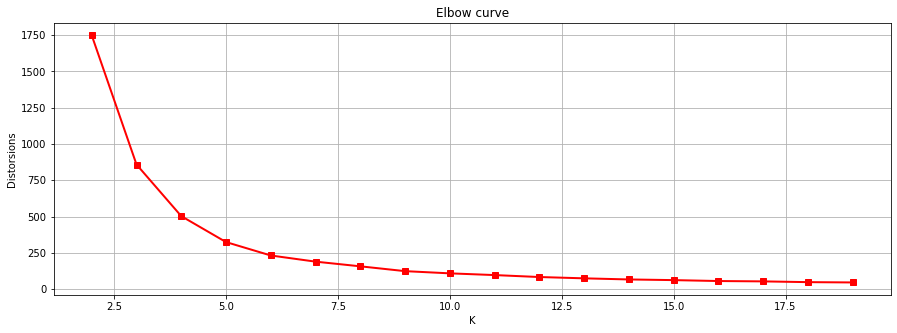

In [36]:
distorsions = []  
for k in range(2, 20):
    model_kmeans1 = KMeans(n_clusters=k)
    model_kmeans1.fit(df_r)
    distorsions.append(model_kmeans1.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, marker='s', c='r', linewidth = 2)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [37]:
# Calculating silhouette scores 

range_n_clusters = np.arange(2,5)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(df_r, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7072579053092612
For n_clusters = 3 The average silhouette_score is : 0.704074532827838
For n_clusters = 4 The average silhouette_score is : 0.7077102533317172


In [38]:
kmean = KMeans(n_clusters = 3)
kmean.fit(df_r)

KMeans(n_clusters=3)

In [39]:
labels = kmean.fit_predict(df_r)
labels = pd.DataFrame(labels)

In [40]:
kmean_df = pd.DataFrame(df_r)
kmean_df['label-Kmean'] = labels
kmean_count = pd.DataFrame(kmean_df['label-Kmean'].value_counts())
kmean_count

,label-Kmean
0,124156
1,43218
2,11155


In [41]:
kmean_df

,total_price_spent,avg_sentiment,total_order,label-Kmean
0,0.001985,1.000000,0.000000,0
1,0.024183,1.000000,0.029046,0
2,0.031640,0.656250,0.031120,1
3,0.007149,1.000000,0.004149,0
4,0.008838,0.500000,0.006224,2
...,...,...,...,...
178524,0.005214,1.000000,0.006224,0
178525,0.005516,1.000000,0.006224,0
178526,0.015708,0.625000,0.014523,1
178527,0.021354,0.857143,0.012448,1


In [42]:
silhouette_kmean = silhouette_score(df_r, labels)
print("Silhouette Score = {} ".format(silhouette_kmean))

Silhouette Score = 0.940450638175018 


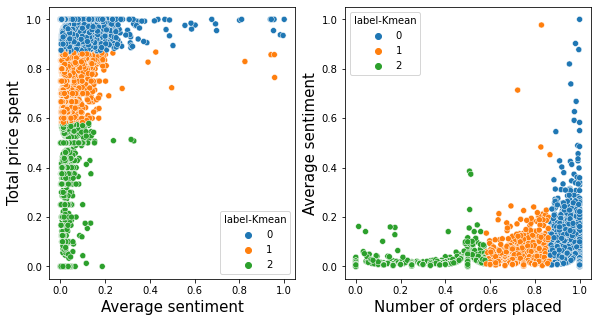

In [43]:
plt.figure(figsize = (15,5))

# plt.subplot(131)
# sb.scatterplot(x = kmean_df["total_price_spent"], y = kmean_df["total_order"], hue = kmean_df['label-Kmean'], data=kmean_df, palette = 'tab10')
# plt.title('K-means Clustering')

plt.subplot(132)
sb.scatterplot(x = kmean_df["total_price_spent"], y  = kmean_df["avg_sentiment"], hue = kmean_df['label-Kmean'], data=kmean_df, palette = 'tab10')
plt.xlabel("Average sentiment", size = 15)
plt.ylabel("Total price spent", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.subplot(133)
sb.scatterplot(x = kmean_df["avg_sentiment"], y = kmean_df["total_order"], hue = kmean_df['label-Kmean'], data=kmean_df, palette = 'tab10')
plt.ylabel("Average sentiment", size = 15)
plt.xlabel("Number of orders placed", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.show()

In [44]:
sentiment = kmean_df['label-Kmean']
sentiment = sentiment.apply(lambda i : str(i))
sentiment = sentiment.apply(lambda i : i.replace("0","Positve"))
sentiment = sentiment.apply(lambda i : i.replace("1","Neutral"))
sentiment = sentiment.apply(lambda i : i.replace("2","Negative"))
sentiment = pd.DataFrame(sentiment)
sentiment

,label-Kmean
0,Positve
1,Positve
2,Neutral
3,Positve
4,Negative
...,...
178524,Positve
178525,Positve
178526,Neutral
178527,Neutral


<AxesSubplot:xlabel='label-Kmean', ylabel='count'>

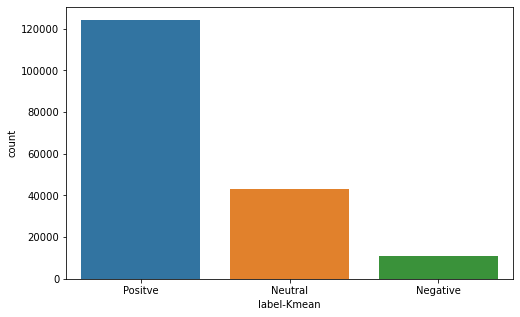

In [45]:
plt.figure(figsize = (8,5)) 
sb.countplot(sentiment['label-Kmean'])


In [46]:
df4 = final_df.copy()
df4['label'] = labels

df4

,reviewerID,total_price_spent,avg_sentiment,total_order,no_of_years,label
0,A0001528BGUBOEVR6T5U,16.276421,2.000000,1,0,0
1,A00201164H8T5GSBKYFP,194.508243,2.000000,15,1,0
2,A0072041HVZ3465DXUOR,254.379405,1.312500,16,1,1
3,A01003458IEUPS8LQ1QU,57.740000,2.000000,3,0,0
4,A0128039E0YIC2VFZXB9,71.299365,1.000000,4,2,2
...,...,...,...,...,...,...
178524,AZZXNUE4RQ6FJ,42.200508,2.000000,4,2,0
178525,AZZY4W8E5AX2K,44.630000,2.000000,4,2,0
178526,AZZYGB3DSML0J,126.457550,1.250000,8,1,1
178527,AZZYW4YOE1B6E,171.795912,1.714286,7,4,1


In [47]:
q = df4[df4.label == 0]

In [48]:
df4[df4.label == 0].sort_values('no_of_years',ascending = False)

,reviewerID,total_price_spent,avg_sentiment,total_order,no_of_years,label
166461,AQP1VPK16SVWM,3374.368594,1.987654,162,20,0
22806,A1HGRL7BMUTLC7,170.856710,1.833333,12,19,0
69423,A2GZR6W8RRCUUY,945.236552,1.958333,48,19,0
75287,A2LHHRGT6WBOB,125.178886,2.000000,4,19,0
18315,A1E0RPGCXS4L2G,90.472252,2.000000,8,19,0
...,...,...,...,...,...,...
86155,A2TQ0BM0IG78ZK,16.870000,2.000000,1,0,0
132582,A3T7HO8SBCH079,33.601167,1.800000,5,0,0
132584,A3T7IC8XFTPBCS,15.423046,2.000000,1,0,0
86152,A2TPXUWO6JPS3B,372.197581,2.000000,10,0,0


In [49]:
q.describe()

,total_price_spent,avg_sentiment,total_order,no_of_years,label
count,124156.000000,124156.000000,124156.000000,124156.000000,124156.0
mean,103.958080,1.962002,6.554883,2.179508,0.0
std,153.714904,0.077665,8.326286,2.637796,0.0
min,0.340000,1.736842,1.000000,0.000000,0.0
25%,44.100000,2.000000,3.000000,0.000000,0.0
50%,70.293492,2.000000,5.000000,1.000000,0.0
75%,116.460696,2.000000,7.000000,3.000000,0.0
max,8029.454150,2.000000,483.000000,20.000000,0.0


In [50]:
final_df.no_of_years.value_counts()

0     55472
1     35513
2     29038
3     20757
4     13313
5      7886
6      4759
7      3324
8      2504
9      1910
10     1279
11      881
12      595
13      439
14      301
15      218
16      164
17      102
18       55
19       18
20        1
Name: no_of_years, dtype: int64

In [51]:
df4[df4.label == 1].describe()

,total_price_spent,avg_sentiment,total_order,no_of_years,label
count,43218.000000,43218.000000,43218.000000,43218.000000,43218.0
mean,111.913167,1.509255,6.697834,2.306053,1.0
std,131.927929,0.151844,6.575857,2.392395,0.0
min,4.670000,1.166667,2.000000,0.000000,1.0
25%,54.810000,1.400000,4.000000,1.000000,1.0
50%,80.701464,1.500000,5.000000,2.000000,1.0
75%,128.072989,1.666667,7.000000,3.000000,1.0
max,7687.023401,1.735849,472.000000,19.000000,1.0


In [52]:
df4[df4.label == 2].describe()

,total_price_spent,avg_sentiment,total_order,no_of_years,label
count,11155.000000,11155.000000,11155.000000,11155.000000,11155.0
mean,81.173789,0.815676,4.344420,1.420529,2.0
std,101.917147,0.337148,5.047566,1.965004,0.0
min,0.950000,0.000000,1.000000,0.000000,2.0
25%,30.090368,0.666667,2.000000,0.000000,2.0
50%,54.930405,1.000000,4.000000,1.000000,2.0
75%,96.715000,1.000000,5.000000,2.000000,2.0
max,2635.201030,1.157895,187.000000,17.000000,2.0


In [53]:
date.rename(columns={"reviewTime_x":"first_order_year", "reviewTime_y":"last_order_year"}, inplace  =True)
date

,reviewerID,first_order_year,last_order_year,no_of_years
0,A1DEHPRSH4BF2P,1998,2013,15
1,A3GYHXLVWTTDV9,1998,2005,7
2,AXWEQGFMF317A,1998,2001,3
3,A2RROM9KCYOYHJ,1998,2000,2
4,A2MIXSIPW7WKT8,1998,1998,0
...,...,...,...,...
178524,A1WF5U85E3T10G,2018,2018,0
178525,ALGEZHAH9OKXA,2018,2018,0
178526,A303SNZ4AR7TDQ,2018,2018,0
178527,A1LCIBTCBBVMTK,2018,2018,0


In [54]:
q1 = q.merge(date,how = 'left', on = "reviewerID")
q1.rename(columns = {"no_of_years_x":"years", "reviewTime_x":"first_order_year","reviewTime_y":"last_order_year"}, inplace = True)
q1.drop(["no_of_years_y",'label'], axis = 1, inplace = True)
q1

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
0,A0001528BGUBOEVR6T5U,16.276421,2.0,1,0,2014,2014
1,A00201164H8T5GSBKYFP,194.508243,2.0,15,1,2012,2013
2,A01003458IEUPS8LQ1QU,57.740000,2.0,3,0,2018,2018
3,A0203183BAH3TR08FZGB,40.046579,2.0,4,0,2015,2015
4,A0220159ZRNBTRKLG08H,54.972476,2.0,5,1,2014,2015
...,...,...,...,...,...,...,...
124151,AZZX23UGJGKTT,29.510000,1.8,5,3,2013,2016
124152,AZZXJAE2DILET,70.487408,2.0,6,1,2017,2018
124153,AZZXNUE4RQ6FJ,42.200508,2.0,4,2,2012,2014
124154,AZZY4W8E5AX2K,44.630000,2.0,4,2,2014,2016


In [55]:
q1.years.value_counts()

0     40360
1     23979
2     19264
3     13717
4      9027
5      5479
6      3411
7      2443
8      1882
9      1436
10      977
11      683
12      466
13      358
14      229
15      175
16      133
17       81
18       39
19       16
20        1
Name: years, dtype: int64

In [56]:
q1[(q1.years == 0) & (q1.avg_sentiment == 2.0)].sort_values("first_order_year")

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
25967,A1SDNJDP8KSE3Y,6.480000,2.0,1,0,1998,1998
21296,A1NA6CWLBFG8MS,16.328010,2.0,1,0,1998,1998
81386,A3HCNU09NLD2V,9.490000,2.0,1,0,1998,1998
109245,AJD69QUGCMYI,34.060000,2.0,1,0,1998,1998
53302,A2MIXSIPW7WKT8,5.320000,2.0,1,0,1998,1998
...,...,...,...,...,...,...,...
35181,A22L4E0KKP8VSZ,110.601301,2.0,10,0,2018,2018
88825,A3PDQN6036GM2C,69.000000,2.0,1,0,2018,2018
84190,A3KBJDMG806Z4W,83.330610,2.0,5,0,2018,2018
53442,A2MO0GTIK8F9VQ,70.766538,2.0,5,0,2018,2018


In [57]:
q1[(q1.first_order_year == 2014) & (q1.last_order_year == 2018)]  ## Loyal customers since past 5 years 

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
46,A100RH4M1W1DF0,778.570000,2.000000,5,4,2014,2018
145,A1048B2CXZ5WVX,795.778640,1.736842,57,4,2014,2018
244,A1081P75N5AQFM,119.360000,1.888889,9,4,2014,2018
253,A108GTRY7D2UVQ,33.470000,2.000000,3,4,2014,2018
289,A109ZEBPQ5EXEG,55.140000,2.000000,4,4,2014,2018
...,...,...,...,...,...,...,...
123997,AZTO9IGU4EQGJ,100.993745,1.750000,8,4,2014,2018
124021,AZUVU38922NZO,69.503635,2.000000,5,4,2014,2018
124061,AZW2TLAQZEYDF,181.761165,2.000000,17,4,2014,2018
124092,AZX7AP790B1U,193.449262,1.937500,16,4,2014,2018


In [58]:
q1.reviewerID[(q1.first_order_year == 2014)].count()

21949

In [59]:
q1[(q1.first_order_year == 2009)]

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
141,A1044Z03CKI6MA,122.142020,2.000000,8,7,2009,2016
152,A104GOLIEAZTT2,46.660000,2.000000,3,2,2009,2011
166,A10562CQXZ5ORC,48.674575,2.000000,4,9,2009,2018
208,A106RL0NL536T6,72.100000,2.000000,4,7,2009,2016
229,A107D0GBCC5SA1,85.064053,2.000000,6,0,2009,2009
...,...,...,...,...,...,...,...
123962,AZS209OMRCU4I,194.808361,1.777778,9,6,2009,2015
124006,AZU0LWSMZTIIS,84.287639,2.000000,5,7,2009,2016
124102,AZXK6PTTPV2UB,29.240000,2.000000,1,0,2009,2009
124127,AZYZILYSQA6VQ,100.109126,2.000000,7,3,2009,2012


In [60]:
q1[(q1.first_order_year == 2009) & (q1.last_order_year == 2018)] ## Loyal customers since past 10 years 

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
166,A10562CQXZ5ORC,48.674575,2.000000,4,9,2009,2018
934,A110GVO80Z9NQ5,148.694638,2.000000,7,9,2009,2018
1569,A11OYES9MYVFA4,43.176571,2.000000,3,9,2009,2018
1720,A11U501VWSGPS,238.230000,2.000000,12,9,2009,2018
1867,A120DADS9WILNI,193.851306,1.941176,17,9,2009,2018
...,...,...,...,...,...,...,...
122885,AYMI9KEY7CTUE,47.830000,2.000000,4,9,2009,2018
123494,AZAC8O310IK4E,290.112868,1.909091,22,9,2009,2018
123559,AZCZ5V33I94LR,576.683504,1.757576,33,9,2009,2018
123856,AZO7QSVRU6ZX1,478.837659,1.843750,32,9,2009,2018


In [61]:
q1[(q1.years >= 10) & (q1.last_order_year == 2018)] 

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
169,A1056Q02JEFJIU,314.898055,1.818182,22,10,2008,2018
174,A105A034ZG9EHO,251.550647,1.833333,12,11,2007,2018
283,A109MI6CYQEUM2,42.110000,2.000000,4,11,2007,2018
480,A10H24TDLK2VDP,783.387136,1.920000,50,14,2004,2018
556,A10KCGSDJJAVRO,193.318005,1.923077,13,13,2005,2018
...,...,...,...,...,...,...,...
123182,AYXHA2GXWJ5PP,492.868741,1.911765,34,10,2008,2018
123257,AZ0T3JFXJMSPK,151.475095,2.000000,10,19,1999,2018
123304,AZ30WN3CT0V9U,95.273954,1.857143,7,11,2007,2018
123330,AZ3WAHJ0BEWQ4,80.704434,2.000000,6,12,2006,2018


In [62]:
q1.to_csv("happy_customers.csv", index = False)

In [63]:
date.to_csv("retention_year_customers.csv", index = False)

In [64]:
p = df4[df4.label == 1]
p

,reviewerID,total_price_spent,avg_sentiment,total_order,no_of_years,label
2,A0072041HVZ3465DXUOR,254.379405,1.312500,16,1,1
7,A0225879AOG5GLHAB7EH,63.120000,1.250000,8,0,1
8,A0228801ER3IBSLNOT5W,178.804236,1.625000,8,2,1
14,A04122366D4S0MPJ6WJD,70.243509,1.200000,5,0,1
18,A05012776MTIS8L40R3I,116.679702,1.700000,10,1,1
...,...,...,...,...,...,...
178505,AZZJZVLNRZ5ZH,123.200000,1.200000,5,0,1
178510,AZZNK4WE8SAMC,69.985335,1.600000,5,1,1
178514,AZZRS2XK17RFQ,51.845709,1.600000,5,0,1
178526,AZZYGB3DSML0J,126.457550,1.250000,8,1,1


In [65]:
p1 = p.merge(date,how = 'left', on = "reviewerID")
p1.rename(columns = {"no_of_years_x":"years", "reviewTime_x":"first_order_year","reviewTime_y":"last_order_year"}, inplace = True)
p1.drop(["no_of_years_y",'label'], axis = 1, inplace = True)
p1

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
0,A0072041HVZ3465DXUOR,254.379405,1.312500,16,1,2013,2014
1,A0225879AOG5GLHAB7EH,63.120000,1.250000,8,0,2018,2018
2,A0228801ER3IBSLNOT5W,178.804236,1.625000,8,2,2016,2018
3,A04122366D4S0MPJ6WJD,70.243509,1.200000,5,0,2012,2012
4,A05012776MTIS8L40R3I,116.679702,1.700000,10,1,2016,2017
...,...,...,...,...,...,...,...
43213,AZZJZVLNRZ5ZH,123.200000,1.200000,5,0,2017,2017
43214,AZZNK4WE8SAMC,69.985335,1.600000,5,1,2016,2017
43215,AZZRS2XK17RFQ,51.845709,1.600000,5,0,2016,2016
43216,AZZYGB3DSML0J,126.457550,1.250000,8,1,2015,2016


In [66]:
p1.to_csv("Neutral_customers.csv", index = False)

In [67]:
r = df4[df4.label == 2]
r

,reviewerID,total_price_spent,avg_sentiment,total_order,no_of_years,label
4,A0128039E0YIC2VFZXB9,71.299365,1.000000,4,2,2
46,A10096Q3EZEU9N,73.805319,1.000000,7,0,2
58,A100P59TGEZHR,56.590000,1.000000,5,0,2
67,A100V5QEICGPDA,30.290000,0.000000,2,0,2
91,A101LMNHTSSMQ1,85.309282,1.000000,4,1,2
...,...,...,...,...,...,...
178474,AZYIBG912W011,126.450715,1.153846,13,3,2
178480,AZYP8MFS3WGA0,18.800000,1.000000,2,1,2
178490,AZZ1KF8RAO1BR,59.030000,0.800000,5,3,2
178517,AZZTIMTAKBPD3,114.384598,1.000000,5,1,2


In [68]:
r1 = r.merge(date,how = 'left', on = "reviewerID")
r1.rename(columns = {"no_of_years_x":"years", "reviewTime_x":"first_order_year","reviewTime_y":"last_order_year"}, inplace = True)
r1.drop(["no_of_years_y",'label'], axis = 1, inplace = True)
r1

,reviewerID,total_price_spent,avg_sentiment,total_order,years,first_order_year,last_order_year
0,A0128039E0YIC2VFZXB9,71.299365,1.000000,4,2,2013,2015
1,A10096Q3EZEU9N,73.805319,1.000000,7,0,2015,2015
2,A100P59TGEZHR,56.590000,1.000000,5,0,2014,2014
3,A100V5QEICGPDA,30.290000,0.000000,2,0,2015,2015
4,A101LMNHTSSMQ1,85.309282,1.000000,4,1,2013,2014
...,...,...,...,...,...,...,...
11150,AZYIBG912W011,126.450715,1.153846,13,3,2015,2018
11151,AZYP8MFS3WGA0,18.800000,1.000000,2,1,2015,2016
11152,AZZ1KF8RAO1BR,59.030000,0.800000,5,3,2014,2017
11153,AZZTIMTAKBPD3,114.384598,1.000000,5,1,2016,2017


In [69]:
data1[data1.reviewerID =="AZYIBG912W011"]

,reviewerID,reviewTime,main_cat,reviewText,review_sentiment,verified
6712,AZYIBG912W011,2017-05-01,Office Products,works as it should,1,True
10597,AZYIBG912W011,2017-08-09,Office Products,as described,1,True
12033,AZYIBG912W011,2017-05-01,Office Products,works as it should,1,True
36260,AZYIBG912W011,2016-04-09,Office Products,as described.,1,True
54808,AZYIBG912W011,2015-04-11,Office Products,"not really easy to use, but at least don't hav...",0,True
69188,AZYIBG912W011,2015-03-01,Office Products,impressed that they continue to work in 32 deg...,2,True
220567,AZYIBG912W011,2018-05-13,Office Products,good pens for how most people would use them -...,2,True
373639,AZYIBG912W011,2015-01-10,Office Products,good light source.,2,True
393225,AZYIBG912W011,2017-01-14,Office Products,as advertised.,1,True
400812,AZYIBG912W011,2017-01-14,Office Products,as advertised.,1,True


In [70]:
r1.to_csv("Not_happy_customers.csv", index = False)

In [71]:
review.reviewerID.nunique()

208917

In [72]:
q1.reviewerID[(q1.first_order_year == 2014)].count()
q1.reviewerID[(q1.first_order_year == 2014) & (q1.last_order_year == 2018)].count()

2426

In [73]:
yrs = [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
tot = []
ret = []
retper = []
a = int
b = int
c = int
for i in yrs:
    a = q1.reviewerID[(q1.first_order_year == i)].count()
    tot.append(a)

    b = q1.reviewerID[(q1.first_order_year == i) & (q1.last_order_year == 2018)].count()
    ret.append(b)
    
    c = round(((b/a) * 100),2)
    retper.append(c)
    
print(ret)
print(tot)
print(retper)
    

[1, 10, 16, 23, 30, 28, 28, 54, 81, 156, 172, 226, 311, 402, 736, 1754, 2426, 3028, 3218, 2478]
[51, 229, 575, 651, 730, 776, 801, 1314, 1784, 2957, 3058, 3549, 3694, 4736, 8194, 18107, 21949, 23202, 17230, 8300]
[1.96, 4.37, 2.78, 3.53, 4.11, 3.61, 3.5, 4.11, 4.54, 5.28, 5.62, 6.37, 8.42, 8.49, 8.98, 9.69, 11.05, 13.05, 18.68, 29.86]


In [74]:
retention = pd.DataFrame()
retention["year"] = yrs 
retention["No. of new customers"] = tot
retention['No of customers retained'] = ret
retention['Percentage of retention'] = retper
retention

,year,No. of new customers,No of customers retained,Percentage of retention
0,1998,51,1,1.96
1,1999,229,10,4.37
2,2000,575,16,2.78
3,2001,651,23,3.53
4,2002,730,30,4.11
5,2003,776,28,3.61
6,2004,801,28,3.50
7,2005,1314,54,4.11
8,2006,1784,81,4.54
9,2007,2957,156,5.28


In [75]:
retention.set_index("year", inplace = True)

In [76]:
retention

,No. of new customers,No of customers retained,Percentage of retention
year,,,
1998,51,1,1.96
1999,229,10,4.37
2000,575,16,2.78
2001,651,23,3.53
2002,730,30,4.11
2003,776,28,3.61
2004,801,28,3.50
2005,1314,54,4.11
2006,1784,81,4.54


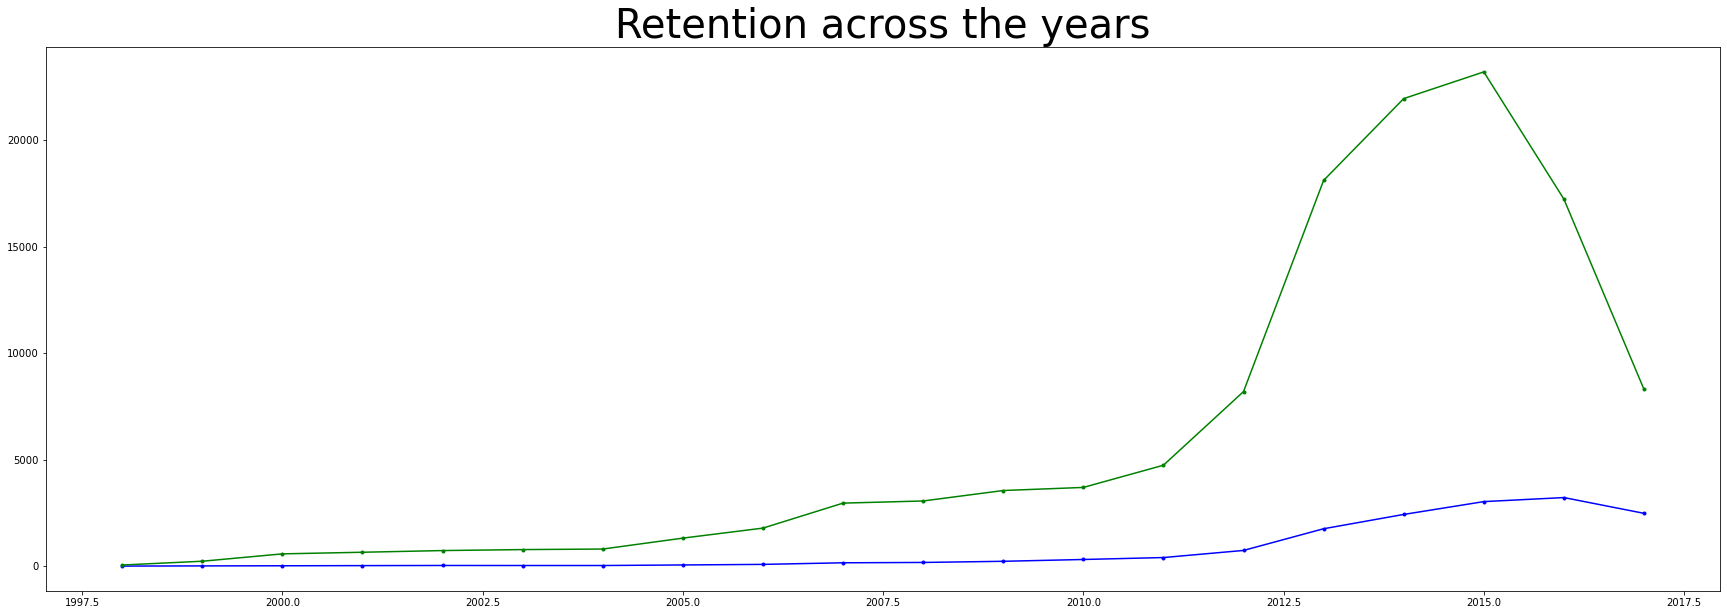

In [77]:
plt.figure(figsize=(30,10))
plt.title("Retention across the years", size = 40)
plt.plot(retention['No of customers retained'], color = 'b', marker = '.')
plt.plot(retention['No. of new customers'], color = 'g', marker = '.')
# plt.plot(retention['Percentage of retention'], color = 'r', marker = '.')



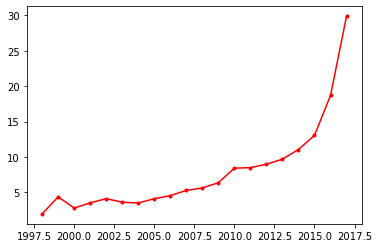

In [78]:
plt.plot(retention['Percentage of retention'], color = 'r', marker = '.')
